<a href="https://colab.research.google.com/github/MarkFuller1/TrafficMiner/blob/master/Models/Traffic_Training_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.15 # need this to fix problem below

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15 # need this to fix problem below`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import pandas as pd
from sklearn import preprocessing

# Cols, not stored in file because its easier for date parsing. 
# timestamp,Ttl Volume,Avg Volume,Ttl Through,
# Ttl Left Turn,Ttl Right Turn,Ttl Wrong Way,Overall Avg Speed, Zone 2, Zone 3, Zone 4, Zone 5, Zone 2.1, Zone 3.1,
# Zone 4.1, Zone 5.1,Class 1: 0-22ft,Class 2: 22-36ft,Class 3: 36-Up, , .1, 04 Eb Through #1, 04 Eb Through #3,
# 07 Eb Left Turn #1, 07 Eb Left Turn #2, 04 Eb Through #1.1, 04 Eb Through #3.1, 07 Eb Left Turn #1.1, 07 Eb Left
# Turn #2.1

# establish hyper parameters
percent_train = 0.95
units = 64
dropout = 0.20
optimizer = 'adam'
loss = 'mae'
epochs = 100
activation='sigmoid'
sequential_entries = 50  # 48 hours worth of memory

In [ ]:
# Read the CSV source
data_source_local = "combined_csv.csv"
data_source_url = "https://raw.githubusercontent.com/MarkFuller1/TrafficMiner/master/Models/combined_csv.csv"
df_data = pd.read_csv(
    data_source_url, parse_dates=True, index_col=0, header=None
)


In [ ]:
# remove the troublesome cols with NaN
df_data = df_data.drop(columns=df_data.columns[(pd.isna(df_data)).any()])
df_data = df_data.drop(columns=df_data.columns[1:])
# print(df_data.columns[1:])

assert df_data.isnull().values.any() == False
print(len(df_data.columns[(pd.isna(df_data)).any()]))

df_data.head(5)

0


,1
0,
2019-08-13 00:30:00,0
2019-08-13 01:00:00,0
2019-08-13 01:30:00,0
2019-08-13 02:00:00,0
2019-08-13 02:30:00,0


In [ ]:
df_data.head(5)

,1
0,
2019-08-13 00:30:00,0
2019-08-13 01:00:00,0
2019-08-13 01:30:00,0
2019-08-13 02:00:00,0
2019-08-13 02:30:00,0


In [ ]:
print(df_data.values[12000])

[172]


In [ ]:
x = df_data.iloc[:, 0:].to_numpy()

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_data.iloc[:, 0:] = x_scaled

In [ ]:
df_data.describe()  #PR: data needs normalization too


,1
count,18183.000000
mean,0.184460
std,0.187810
min,0.000000
25%,0.017804
50%,0.133531
75%,0.302671
max,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6a4897198>]],
      dtype=object)

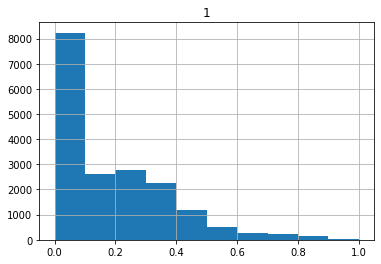

In [ ]:
df_data.hist()

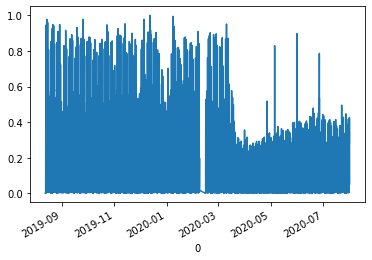

In [ ]:
# Display data on chart
fig, ax = plt.subplots()
df_data.plot(legend=False, ax=ax)
plt.show()

In [ ]:
df_data.head(5)
# print(df_data.loc[df_data[0] == '03/13/2020 00:00'])

,1
0,
2019-08-13 00:30:00,0.0
2019-08-13 01:00:00,0.0
2019-08-13 01:30:00,0.0
2019-08-13 02:00:00,0.0
2019-08-13 02:30:00,0.0


In [ ]:
print(df_data.iloc[1200].name)
print(df_data.index)

2019-09-06 08:30:00
DatetimeIndex(['2019-08-13 00:30:00', '2019-08-13 01:00:00',
               '2019-08-13 01:30:00', '2019-08-13 02:00:00',
               '2019-08-13 02:30:00', '2019-08-13 03:00:00',
               '2019-08-13 03:30:00', '2019-08-13 04:00:00',
               '2019-08-13 04:30:00', '2019-08-13 05:00:00',
               ...
               '2020-07-31 19:30:00', '2020-07-31 20:00:00',
               '2020-07-31 20:30:00', '2020-07-31 21:00:00',
               '2020-07-31 21:30:00', '2020-07-31 22:00:00',
               '2020-07-31 22:30:00', '2020-07-31 23:00:00',
               '2020-07-31 23:30:00', '2020-08-01 00:00:00'],
              dtype='datetime64[ns]', name=0, length=18183, freq=None)


In [ ]:
df_data.values[0:50]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18991098],
       [0.28783383],
       [0.30563798],
       [0.34718101],
       [0.3694362 ],
       [0.44658754],
       [0.384273  ],
       [0.35756677],
       [0.32937685],
       [0.41543027],
       [0.46439169],
       [0.40504451],
       [0.52818991],
       [0.66468843],
       [0.91246291],
       [0.94510386],
       [0.72848665],
       [0.54747774],
       [0.39465875],
       [0.28189911],
       [0.28041543],
       [0.22255193],
       [0.23293769],
       [0.15875371],
       [0.10385757],
       [0.07121662],
       [0.038

In [ ]:
import math

# Prep train and test data
df_data_pre, df_data_post = df_data.loc[df_data.index <= '03-13-2020 00:00:00'], df_data.loc[df_data.index > '03-13-2020 00:00:00']

#Make the shapes nice so that batching works properely
df_data_pre = df_data_pre.drop(df_data_pre.tail(21).index, inplace=False)
df_data_post = df_data_post.drop(df_data_post.tail(12).index, inplace=False)

print(df_data_pre.shape, df_data_post.shape)

print("end of first:", round(df_data_pre.shape[0] * percent_train))

border = round(df_data_pre.shape[0] * percent_train)
altered_border = int(math.floor(border / 100)) * 100
print("end of first:", altered_border)

train_pre, test_pre = df_data_pre[0:altered_border], df_data_pre[altered_border:] 

border = round(df_data_post.shape[0] * percent_train)
altered_border = int(math.floor(border / 100)) * 100
print("end of first:", altered_border)

train_post, test_post =  df_data_post[0:altered_border], df_data_post[altered_border:] 

train_pre.shape, test_pre.shape, train_post.shape, test_post.shape

(11000, 1) (7150, 1)
end of first: 10450
end of first: 10400
end of first: 6700


((10400, 1), (600, 1), (6700, 1), (450, 1))

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []

def create_sequences(X, y, time_steps=sequential_entries):
    Xs, ys = [], []

    for i in range(len(X)-time_steps):
      Xs.append(list(X.iloc[i:(i+time_steps)].values))
      ys.append(list(y.iloc[i+time_steps]))

    return np.array(Xs), np.array(ys)

    
def genNTrain(train, test):
  X_train, y_train = create_sequences(train, train)
  X_test, y_test = create_sequences(test, test)

  print(f'Training shape: {X_train.shape}')
  print(f'Testing shape: {X_test.shape}')
  print(y_test.shape)


  return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = genNTrain(train_pre, test_pre)
# X_train, y_train, X_test, y_test = genNTrain(train_post, test_post)

Training shape: (10350, 50, 1)
Testing shape: (550, 50, 1)
(550, 1)


In [ ]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, TimeDistributed, RepeatVector, Dense, BatchNormalization, Input, Activation, Flatten
from tensorflow.keras.optimizers import SGD

input_shape=(sequential_entries, X_train.shape[1], X_train.shape[2])

timesteps = sequential_entries
n_features = 1

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mse')
model.summary()
# define model
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=False))
# model.add(Dropout(dropout))
# model.add(BatchNormalization())
# model.add(RepeatVector(timesteps))
# model.add(LSTM(32, activation='relu', return_sequences=True))
# model.add(Dropout(dropout))
# model.add(BatchNormalization())
# model.add(LSTM(32, activation='relu', return_sequences=True))
# model.add(Dropout(dropout))
# model.add(BatchNormalization())
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(Dropout(dropout))
# model.add(BatchNormalization())
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(Dropout(dropout))
# model.add(BatchNormalization())
# model.add(TimeDistributed(Dense(n_features)))

model.compile(optimizer=SGD(lr=0.01, momentum=0.75, clipnorm=1.0), loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 50, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 128)           5

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# callbacks
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

early_stop = EarlyStopping(
    monitor='val_loss', min_delta=0.1, patience=4, verbose=1, mode='auto',
    baseline=None, restore_best_weights=False
)

# fit model
history = model.fit(X_train, X_train, epochs=100, batch_size=sequential_entries, callbacks=[reduce_lr, early_stop], validation_data=(X_test, X_test))

                


Train on 10350 samples, validate on 550 samples
Epoch 1/100
10350/10350 [==============================] - 62s 6ms/sample - loss: 0.1719 - val_loss: 0.0421
Epoch 2/100
10350/10350 [==============================] - 58s 6ms/sample - loss: 0.0453 - val_loss: 0.0417
Epoch 3/100
10350/10350 [==============================] - 58s 6ms/sample - loss: 0.0450 - val_loss: 0.0407
Epoch 4/100
10350/10350 [==============================] - 58s 6ms/sample - loss: 0.0448 - val_loss: 0.0410
Epoch 5/100
10350/10350 [==============================] - 58s 6ms/sample - loss: 0.0444 - val_loss: 0.0398
Epoch 00005: early stopping


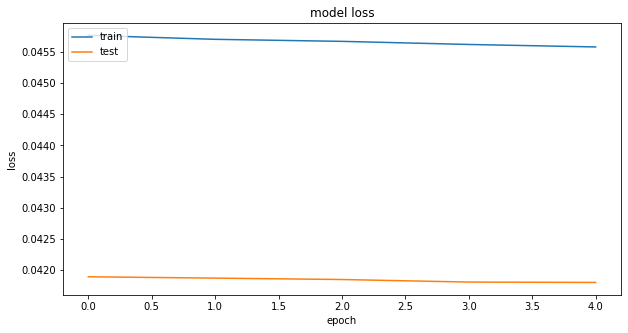

In [ ]:
# history for loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from datetime import datetime

model.save('./models/1_model/'+ datetime.now().strftime("%H:%M:%S"))

In [ ]:
import tensorflow
model = tensorflow.keras.models.load_model('./07_10_46')

Reconstruction error threshold: 0.2882724275106138


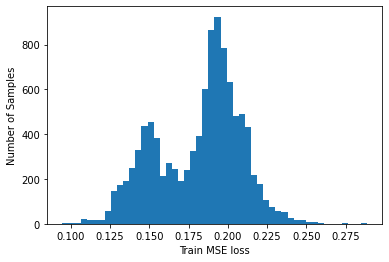

In [ ]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MSE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

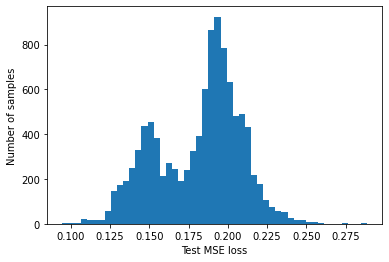

In [ ]:

X_test_pred = model.predict(X_train, verbose=0)
test_mae_loss = np.mean(np.abs(X_train_pred-X_train), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MSE loss')
plt.ylabel('Number of samples');

In [ ]:
import plotly.graph_objects as go

test_score_df = pd.DataFrame(train_pre[sequential_entries:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
# test_score_df['predicted'] = X_train_pred.values[0]
test_score_df[0] = train_pre[sequential_entries:]



fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df.index, y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df.index, y=test_score_df['threshold'], name='Threshold'))
# fig.add_trace(go.Scatter(x=test_score_df.index, y=test_score_df['predicted'], name='Predicted'))

fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [ ]:
test_score_df[test_score_df['anomaly'] == True]

,1,loss,threshold,anomaly,0
0,,,,,


In [ ]:
import pickle

test_score_df.to_pickle("test_score_df")